Paul Fischer

PHYS 522 Statistical Physics

Dr. Peterson

1/31/2021

# <center>Homework 0 Bonus</center>

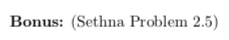

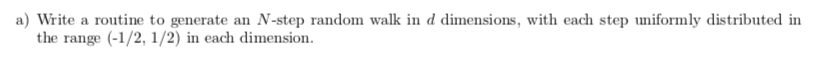

Let us start by defining the function randWalk which accomplishes the task prompted above.

In [70]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def randWalk(n, d):
    """Returns an N-step random walk in d dimensions, with each step
    uniformly distributed in the range (−1/2, 1/2) in each dimension by 
    generating the steps as an N × d array then doing a cumulative sum."""
    
    stepArray = np.zeros(shape=(n, d))
    step = np.zeros(d)
    
    for j in range(n):
        for i in range(len(step)):
            step[i] = uniform(-1/2,1/2)
        stepArray[j] = step
    
    sNCumSum = np.cumsum(stepArray, axis=0)
    
    return sNCumSum

Now let us plot $x_t$ vs $t$ for three 10,000-step walks.

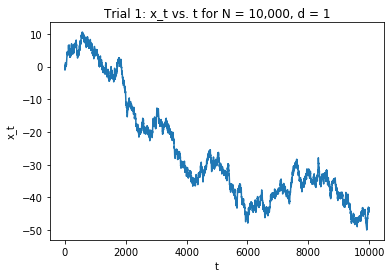

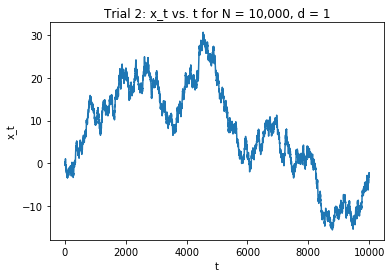

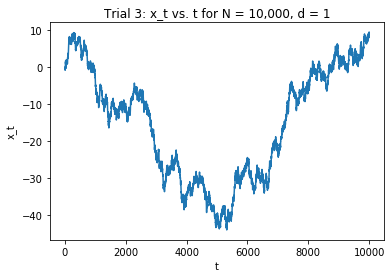

In [190]:
n = 10000
d = 1
t = range(n)

xT1 = randWalk(n, d)
xT2 = randWalk(n, d)
xT3 = randWalk(n, d)

plt.plot(t, xT1)
plt.title('Trial 1: x_t vs. t for N = 10,000, d = 1')
plt.ylabel('x_t')
plt.xlabel('t')
plt.show()

plt.plot(t, xT2)
plt.title('Trial 2: x_t vs. t for N = 10,000, d = 1')
plt.ylabel('x_t')
plt.xlabel('t')
plt.show()

plt.plot(t, xT3)
plt.title('Trial 3: x_t vs. t for N = 10,000, d = 1')
plt.ylabel('x_t')
plt.xlabel('t')
plt.show()

Now let us plot $x$ vs. $y$ for 2D random walks with N = 10, 1,000, and 100,000.

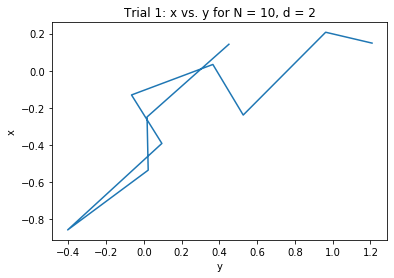

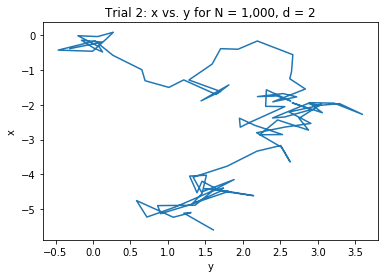

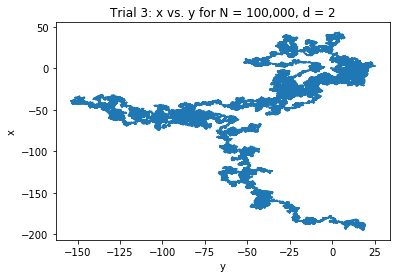

In [199]:
n1 = 10
n2 = 100
n3 = 100000
d = 2

trial1 = randWalk(n1, d)
x1 = trial1[:,0]
y1 = trial1[:,1]

trial2 = randWalk(n2, d)
x2 = trial2[:,0]
y2 = trial2[:,1]

trial3 = randWalk(n3, d)
x3 = trial3[:,0]
y3 = trial3[:,1]

plt.plot(y1, x1)
plt.title('Trial 1: x vs. y for N = 10, d = 2')
plt.ylabel('x')
plt.xlabel('y')
plt.show()

plt.plot(y2, x2)
plt.title('Trial 2: x vs. y for N = 1,000, d = 2')
plt.ylabel('x')
plt.xlabel('y')
plt.show()

plt.plot(y3, x3)
plt.title('Trial 3: x vs. y for N = 100,000, d = 2')
plt.ylabel('x')
plt.xlabel('y')
plt.show()

For N = 1 the plot covers about 1 unit vertically, for N = 1,000 the plot covers about 6 units vertically, and for N = 100,000 the plot covers about 250 units vertically. Hence, it appears that multiplying the number of steps by 100 approximately raises the net distance by an order of magnitude. 

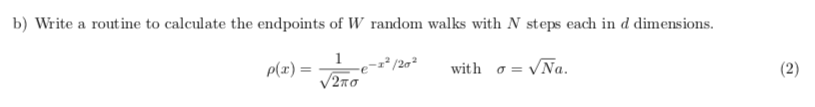

Let us start by defining the function endPts which accomplishes the task prompted above.

In [91]:
def endPts(w, n, d):
    """Returns the endpoints of W random walks with N steps each in d dimensions."""
    
    endPtArray = np.zeros(shape=(w,d))
    
    for i in range(w):
        sN = randWalk(n, d)[-1]
        endPtArray[i] = sN
        
    return endPtArray

Now let us do a scatter plot of the endpoints of 10,000 random walks with N = 1 and 10, superimposed on the same plot.

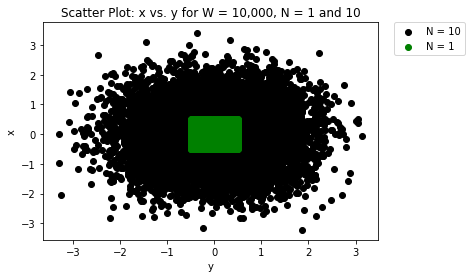

In [175]:
w = 10000
n1 = 10
n2 = 1
d = 2

trial1EndPts = endPts(w, n1, d)
x1EndPts = trial1EndPts[:,0]
y1EndPts = trial1EndPts[:,1]

trial2EndPts = endPts(w, n2, d)
x2EndPts = trial2EndPts[:,0]
y2EndPts = trial2EndPts[:,1]

plt.scatter(y1EndPts, x1EndPts, color='k', label="N = 10")
plt.scatter(y2EndPts, x2EndPts, color='g', label="N = 1")

plt.title('Scatter Plot: x vs. y for W = 10,000, N = 1 and 10')
plt.ylabel('x')
plt.xlabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

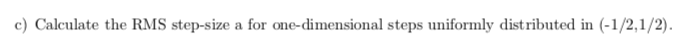

Let us start by calculating the RMS step-size a for one-dimensional steps uniformly distributed in (-1/2, 1/2) prompted above with W = 10,000.

In [200]:
a = np.std(endPts(10000, 1, 1))
print(a)

0.2881918999644639


Now let us define a function that plots a histogram of the endpoints of W one-dimensional random walks with N steps and 50 bins, along with the prediction of the normal probability distribution, for x in (−3σ, 3σ). 

In [185]:
def histEndPts(w, n):
    """Returns a histogram of the endpoints of W one-dimensional random walks 
    with N steps and 50 bins, along with the prediction of the normal probability distribution, 
    for x in (−3σ, 3σ)."""
    
    endPtArray = endPts(w, n, 1)
    
    sigma = np.std(endPtArray)
    x = np.linspace(-3*sigma, 3*sigma, num=10000)
    probDist = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2))
    
    plt.hist(endPtArray, bins=50, density=True, label="normalized endpoint values")
    plt.plot(x, probDist, label="normal probability distribution")
    
    plt.title('Histogram of Normalized Endpoints: W = %d, d = 1, N = %d' % (w, n))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

Now let us plot the histograms with W = 10,000 for N = 1, 2, 3, and 5.

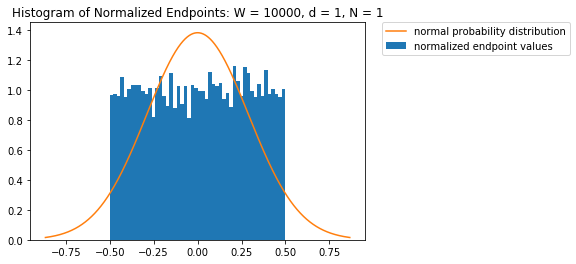

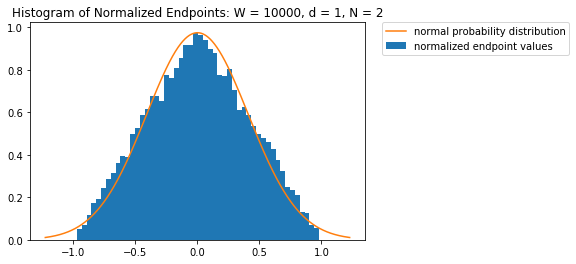

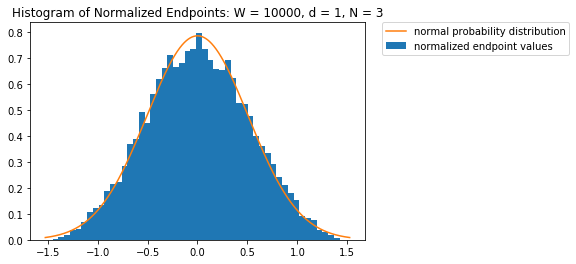

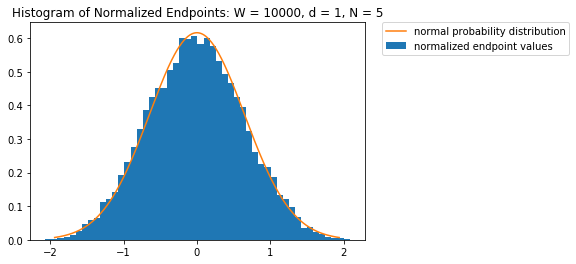

In [187]:
for i in [1, 2, 3, 5]:
    histEndPts(10000, i)

We can see that the Gaussian distribution become a good approximation to the random walk after only 2 steps.